In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import re
import string
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steam-reviews/output_steamspy.csv
/kaggle/input/steam-reviews/output.csv


In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [52]:
FILE_PATH = '/kaggle/input/steam-reviews/output.csv'
df = pd.read_csv(f'{FILE_PATH}')
df.head()


,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


In [53]:
df.dropna(subset=['content'], inplace=True) #Getting rid of NaN

In [55]:
text = df['content']

0                      At least its a counter strike -1/100
1         Uh... So far my playthrough has not been great...
2                                 Better mechanics than cs2
3                     buggy mess and NOT fun to play at all
4         Whoever came up with this, is gonna fucking ge...
                                ...                        
201146                    This trash for sick anime clowns!
201147                                    Not noob friendly
201148                        Total trash for anime clowns!
201149    Unplayable. It keeps trying to update but then...
201150                                      Bring back csgo
Name: content, Length: 200723, dtype: object

In [56]:
labels = df['is_positive']

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(text,
  labels, test_size=0.2,
  random_state=42)

In [58]:
tfidf = TfidfVectorizer(stop_words='english',max_features=5000)
train = tfidf.fit_transform(xtrain)
test = tfidf.transform(xtest)


In [67]:
pac = PassiveAggressiveClassifier(max_iter=1500, loss = 'hinge',early_stopping = True,n_iter_no_change = 10,random_state = 42,verbose = 0)
pac.fit(train, ytrain)


ypred = pac.predict(test)

accuracy = accuracy_score(ytest, ypred)
print(f'Точность Пассивно-агрессивного классификатора: {round(accuracy*100,2)}%')


Точность Пассивно-агрессивного классификатора: 80.03%


In [60]:
def show_confusion_matrix(confusion):
  # Вычисление матрицы ошибок и ее нормализация
  plt.figure(figsize=(10,10))

  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title("Матрица ошибок")
  plt.ylabel("Истинные метки")
  plt.xlabel("Предсказанные метки")

In [61]:
print(confusion_matrix(ytest, ypred, labels=["Positive", "Negative"]))
confusion = confusion_matrix(ytest, ypred, labels=["Positive", "Negative"])

[[17390  3099]
 [ 5226 14430]]


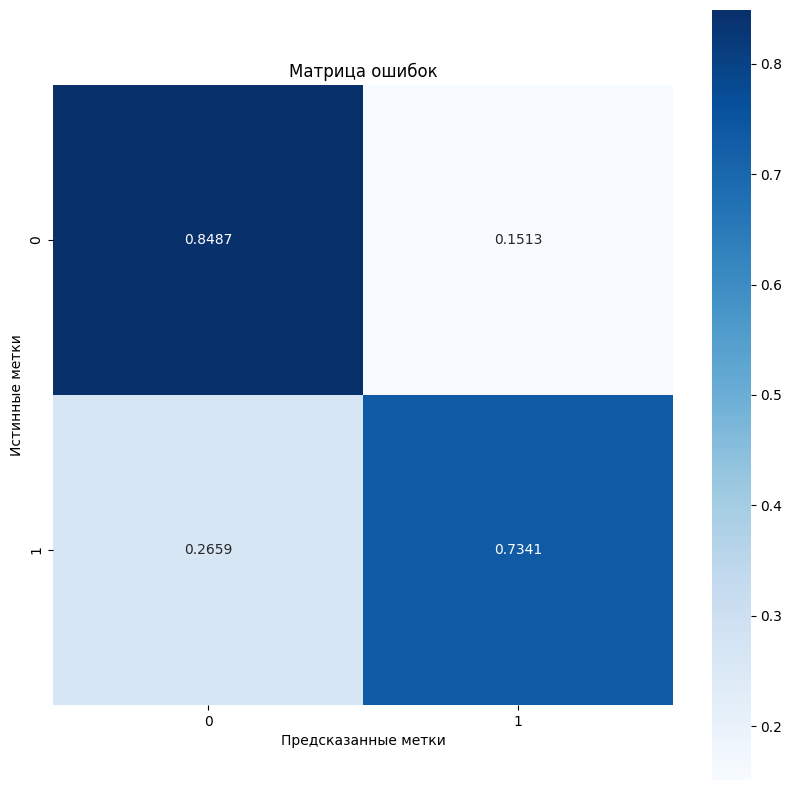

In [62]:
show_confusion_matrix(confusion)

In [69]:
# Example Prediction
sample_reviews = ["I didn't like the game", 
                  "A short but fun addition to the half-life universe."]
sample_vec = tfidf.transform(sample_reviews)
sample_pred = pac.predict(sample_vec)

for pred in sample_pred:
    print(pred)

Negative
Positive
